## Final Project Submission


* Student name: Jack Risse
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Howard Smith
* Blog post URL:


In [1]:
import pandas as pd # importing all the standard packages and libraries needed to start
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style()
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore') # gets rid of the useless warnings matplotlib gives us when plotting 

In [2]:
df = pd.read_csv('kc_house_data.csv') # converting the provided csv file to a dataframe

In [3]:
yr_built = df.yr_built
sqft_living = df.sqft_living # it looks like I just dropped these columns at first without even doing some digging
df.drop(columns=['id', 'date', 'view', 'lat', 'long', 'sqft_lot15', 
                 'sqft_living15', 'yr_built', 'zipcode', 'sqft_living'], 
        axis=1, inplace=True) # but I didn't as I was cleaning the data and playing around I just kept adding the 
                              # appropriate features to the list

### Data Cleaning/Scraping

In [4]:
df.info() # observing the chacteristics of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_renovated     17755 non-null float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.8+ MB


In [5]:
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].median()) # waterfront had NaN for the missing values
                                                                      # so I filled those missing values with its 
                                                                      # median

In [6]:
df['yr_renovated'] = df['yr_renovated'].fillna(0) # yr_renovated had NaN for the missing values, those values were 
                                                  # were filled with zeros assuming that if no input was put in then
                                                  # that means the house wasn't ever renovated

In [7]:
df['waterfront'] = df['waterfront'].astype(int) # converting type to int no reason to have a decimal when the number 
df['floors'] = df['floors'].astype(int)         # is representing just yes or no and because you can't have 1.5 floors

In [8]:
df.isna().any() # checking if there still are any NaN left in the dataframe

price            False
bedrooms         False
bathrooms        False
sqft_lot         False
floors           False
waterfront       False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_renovated     False
dtype: bool

In [9]:
df.sqft_basement.replace(['?'], 0, inplace=True) # just by looking at the data sqft_basement seemed to have an odd 
                                                 # value so it was replaced with a 0 assuming a "?" meant no basement
df.sqft_basement = df['sqft_basement'].astype(float).astype(int) # was type string changed it to int(s)

In [10]:
df.bathrooms = df.bathrooms.round().astype(int) # rounded bathrooms at first to make it to the closest nearest whole
df.yr_renovated = df.yr_renovated.astype(int)   # number because converting to doesn't follow normal rounding rules
df  = df.loc[df['bedrooms']!= 33]  # removing an extreme outlier assuming it was a typo

### EDA

#### Question 1
Sqft_living was chosen to be taken out as a feature due multicolinearity with multiple features and you can get the total sqft living of your house with the other given features by adding sqft above and sqft basement. So the question that was answered is "How great was the correlation between price and sqft_living?". Based off of the scatterplot below it's safe to say that there's for sure a positive relationship and that the relationship is great.

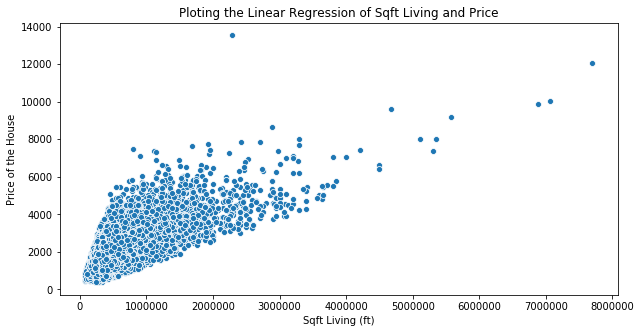

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(df.price, sqft_living)
plt.title('Ploting the Linear Regression of Sqft Living and Price')
plt.xlabel('Sqft Living (ft)')
plt.ylabel('Price of the House')
plt.show()

#### Question 2
We wanted to see "Was King County growing?". If a city is growing that usually affects the prices of the house because growing mean popular and popular means demand and as demand goes up prices go up, simple economics.

In [38]:
decades = np.linspace(1900, 2016, 30, dtype='int') # assigning an array with intervals of decades 
count = [] # count will be a list of numbers representing how many houses were built in that decades
for i in range(0,29): # for loop to create the count list conditionals to count how many houses were built in a given
    count.append(len(df[(yr_built >= decades[i]) & (yr_built <= decades[i+1])])) # decade

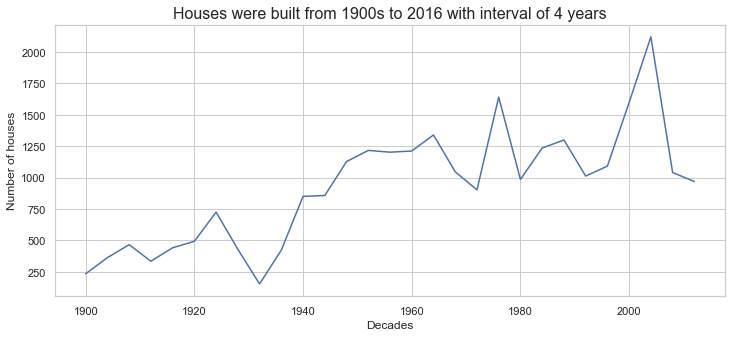

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.lineplot(decades[:-1], count)
plt.title('Houses were built from 1900s to 2016 with interval of 4 years', 
          fontdict={'fontsize': 16})
plt.xlabel('Decades')
plt.ylabel('Number of houses')
plt.show()

King County was growing until you see the massive drop in the 2000s which can be explained by the 2008 recession and on top of that the recession's effect on the house market was detrimental.

#### Question 3
Which makes more money, adding a bathroom or a bedroom?

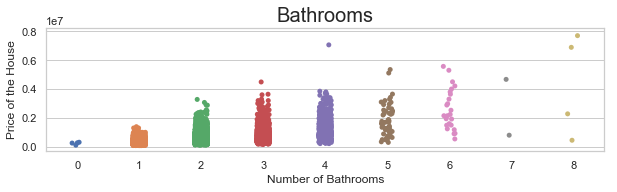

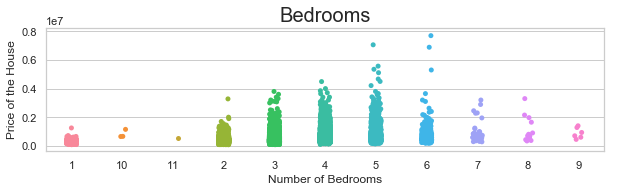

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(211)
sns.stripplot(x='bathrooms', y='price', data=df)
plt.title('Bathrooms', fontdict={'fontsize':20})
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price of the House')
plt.figure(figsize=(10,5))
plt.subplot(212)
sns.stripplot(x='bedrooms', y='price', data=df)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price of the House')
plt.title('Bedrooms', fontdict={'fontsize':20})
plt.show()

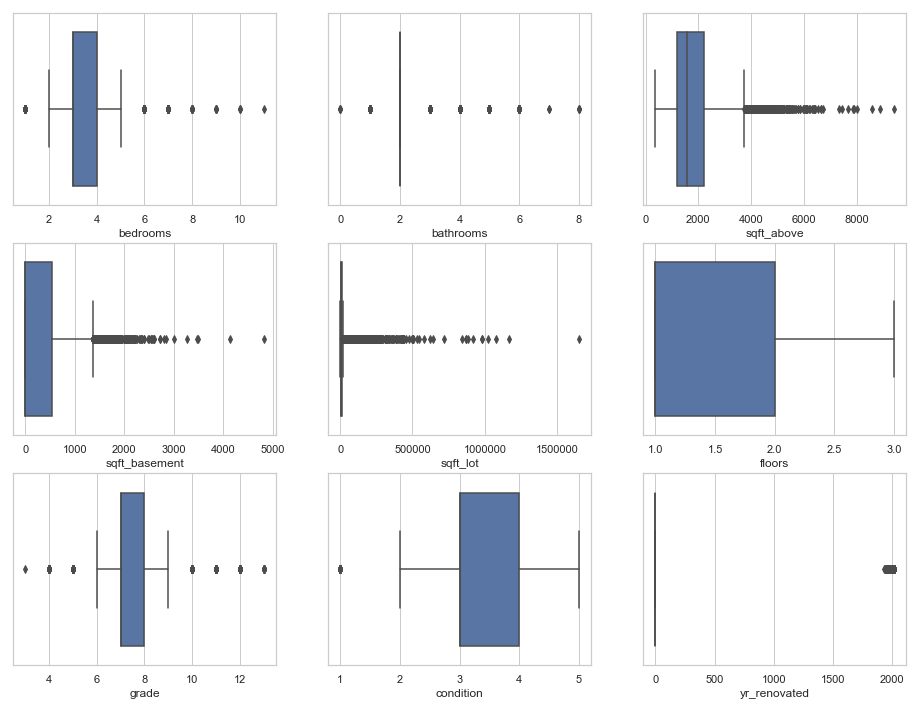

In [13]:
sns.set(style="whitegrid")  # wanted to check the outliers with in each feature, as you can see there are many outliers
plt.figure(figsize=(16,12)) # the outliers weren't dealt with because if the outliers were dealt with by removing them 
plt.subplot(331)            # would make the data size much smaller and the thouhgt was that the outliers were key info
sns.boxplot(df.bedrooms)
plt.subplot(332)
sns.boxplot(df.bathrooms)
plt.subplot(333)
sns.boxplot(df.sqft_above)
plt.subplot(334)
sns.boxplot(df.sqft_basement)
plt.subplot(335)
sns.boxplot(df.sqft_lot)
plt.subplot(336)
sns.boxplot(df.floors)
plt.subplot(337)
sns.boxplot(df.grade)
plt.subplot(338)
sns.boxplot(df.condition)
plt.subplot(339)
sns.boxplot(df.yr_renovated)

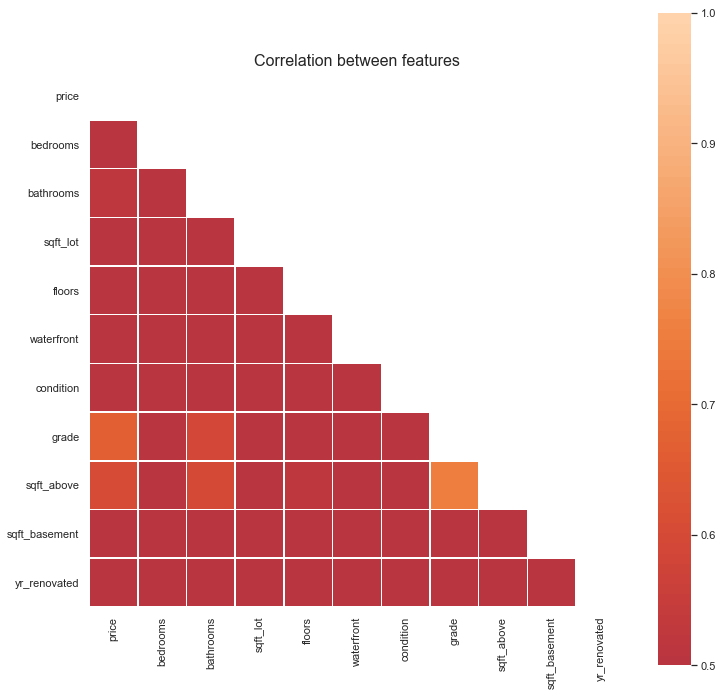

In [14]:
plt.figure(figsize=(12,12)) # a correlation visual showing the correlation between each and every feature that was put
corr = df.corr()            # into the models
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, center=0, vmin=0.5, square=True, linewidths=.5)
plt.title('Correlation between features', fontdict={'fontsize': 16})
plt.show()

### Creating Dummies

In [15]:
df.bedrooms = df.bedrooms.astype(str) # converting categorical features to strings to make dummy columns
df.bathrooms = df.bathrooms.astype(str)
df.waterfront = df.waterfront.astype(str)
df.floors = df.floors.astype(str)                 
df.condition = df.condition.astype(str)
df.grade = df.grade.astype(str)

waterfront_dummies = pd.get_dummies(df.waterfront, prefix='waterfront', drop_first=True) # creating the dummies
condition_dummies = pd.get_dummies(df.condition, prefix='condition', drop_first=True)
grade_dummies = pd.get_dummies(df.grade, prefix='grade', drop_first=True)     
floors_dummies = pd.get_dummies(df.floors, prefix='floors', drop_first=True)  
bedrooms_dummies = pd.get_dummies(df.bedrooms, prefix='bedrooms', drop_first=True)
bathrooms_dummies = pd.get_dummies(df.bathrooms, prefix='bathrooms', drop_first=True)

cat_df = pd.concat([waterfront_dummies, condition_dummies, grade_dummies, # creating categorical and continuous 
                  floors_dummies, bedrooms_dummies, bathrooms_dummies], axis=1) # dataframes
con_df = pd.DataFrame(data=df, columns=['price', 'sqft_above', 'sqft_lot', 'sqft_basement']) 

### Normalizing the Continuous Features

In [16]:
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler was imported to put all of continuous features into the 
                                               # the same scale because each feature had their own "unit" 
scaler = MinMaxScaler()                        # this ensures that our model won't get confused or misinterpret the 
                                               # data when learning and creating relationships between the features
conNorm = scaler.fit_transform(con_df)

con_df = pd.DataFrame(conNorm, columns=['price', 'sqft_above', 'sqft_lot', 'sqft_basement'])

### Modeling

Two models are going to be created. Both using Linear Regression using Ordered Least Squares. One model will be predicting price from the continuous features. The other model will be predicting price from the continuous model.

In [17]:
from sklearn.model_selection import train_test_split # train_test_split was imported split our data into a training
from sklearn.metrics import mean_squared_error       # sample and test sample. This was done to make sure our model 
import statsmodels.api as sm                         # isn't overfitted and spits out inaccurate results

xcon = con_df.iloc[:, 1:] # creating a dataframe with just the continuous features without price
xcat = cat_df             # reassigning cat_df to xcat just a naming preference of mine when training the models
y = list(df.price)        # for some reason statsmodels didn't like that the target variable was in a series so it was 
                          # converted
con_xtrain, con_xtest, con_ytrain, con_ytest = train_test_split(xcon, y, test_size=.3) # spliting the data

con_model = sm.OLS(con_ytrain, con_xtrain).fit() # linear regression OLS (ordered least squares)
con_yhat = con_model.predict(con_xtest)          # predicted prices derived the model with our continuous features

con_resd = np.round(con_ytest - con_yhat, decimals=2) # get the residuals to tell us the average distance from the
                                                      # real price and the price 
print('r2: ', np.round(con_model.rsquared))
print('\n**********************\n')
print('p-values: \n', con_model.pvalues)
print('\n**********************\n')         # prints out some of the key stats from the summary of our model
print('Params: \n', con_model.params)
print('\n**********************\n')
print('Mean of Residuals: ', np.round(con_resd.mean(), decimals=2))

r2:  1.0

**********************

p-values: 
 sqft_above       0.000000
sqft_lot         0.000002
sqft_basement    0.000000
dtype: float64

**********************

Params: 
 sqft_above       2.778371e+06
sqft_lot        -4.120605e+05
sqft_basement    1.567456e+06
dtype: float64

**********************

Mean of Residuals:  18351.09


### Categorical Modeling

Modeling with the categorical features. On the first run there were some high pvalues. I delt with the high p-values with the backward approach for feature selection. The backward approach is you run the model and each time you run that model drop the p-value until all the p-values are less than .05.

In [18]:
cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # linear regression using the OLS (ordered least squares) model
cat_yhat = cat_model.predict(cat_xtest)          # predicted prices derived from the model with our continuous features
print('p-values: \n', np.round(cat_model.pvalues, decimals=5)) # printing out the p-values made the backward feature 
print('\n**********************\n') # selection process quicker 

p-values: 
 waterfront_1    0.00000
condition_2     0.30133
condition_3     0.15677
condition_4     0.01175
condition_5     0.00004
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.00000
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00000
floors_3        0.02222
bedrooms_10     0.23974
bedrooms_11     0.60944
bedrooms_2      0.25150
bedrooms_3      0.84044
bedrooms_4      0.11444
bedrooms_5      0.00018
bedrooms_6      0.00040
bedrooms_7      0.00405
bedrooms_8      0.00000
bedrooms_9      0.01062
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7         NaN
bathrooms_8     0.00000
dtype: float64

**********************



I tried to make a model with the category features. I couldn't seemed to able to get the features into dummie

In [19]:
cat_df.drop(columns=['condition_3'], inplace=True) # dropped the feature with the greatest p-value that was above .05

In [20]:
cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 2nd iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
condition_2     0.95442
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.00000
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00000
floors_3        0.03451
bedrooms_10     0.13068
bedrooms_11     0.57094
bedrooms_2      0.06627
bedrooms_3      0.56117
bedrooms_4      0.04390
bedrooms_5      0.00002
bedrooms_6      0.00000
bedrooms_7      0.06204
bedrooms_8      0.00192
bedrooms_9      0.00020
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.00000
bathrooms_8     0.00000
dtype: float64

**********************



In [21]:
cat_df.drop(columns=['bedrooms_11'], inplace=True) # dropping the feature with the greatest p-value that's above .05

In [22]:
cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 3rd iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
condition_2     0.90036
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.00059
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00000
floors_3        0.02403
bedrooms_10     0.42905
bedrooms_2      0.13527
bedrooms_3      0.50455
bedrooms_4      0.03456
bedrooms_5      0.00001
bedrooms_6      0.00007
bedrooms_7      0.02265
bedrooms_8      0.26942
bedrooms_9      0.00023
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7         NaN
bathrooms_8     0.00000
dtype: float64

**********************



In [23]:
cat_df.drop(columns=['bedrooms_3'], inplace=True) # dropping the feature with the greatest p-value that's above .05

In [24]:
cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 4th iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
condition_2     0.33962
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.00000
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00000
floors_3        0.23757
bedrooms_10     0.29655
bedrooms_2      0.00001
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.00000
bedrooms_7      0.09507
bedrooms_8      0.00000
bedrooms_9      0.07290
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.00000
bathrooms_8     0.00000
dtype: float64

**********************



In [25]:
cat_df.drop(columns=['bedrooms_10'], inplace=True) # dropping the feature with the greatest p-value that's above .05

In [26]:
cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 5th iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
condition_2     0.61678
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.00033
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00000
floors_3        0.14823
bedrooms_2      0.00090
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.00001
bedrooms_7      0.96259
bedrooms_8      0.00041
bedrooms_9      0.03791
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7         NaN
bathrooms_8     0.00000
dtype: float64

**********************



In [27]:
cat_df.drop(columns=['bedrooms_7'], inplace=True) # dropping the feature with the greatest p-value that's above .05

In [28]:
cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 6th iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
condition_2     0.96069
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.00053
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00000
floors_3        0.27230
bedrooms_2      0.00129
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.00000
bedrooms_8      0.00014
bedrooms_9      0.20028
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.00000
bathrooms_8     0.00000
dtype: float64

**********************



In [29]:
cat_df.drop(columns=['condition_2'], inplace=True)# dropping the feature with the greatest p-value that's above .05

In [30]:
cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 7th iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.00027
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00000
floors_3        0.05390
bedrooms_2      0.00137
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.00000
bedrooms_8      0.00000
bedrooms_9      0.01170
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.02271
bathrooms_8     0.00000
dtype: float64

**********************



In [31]:
cat_df.drop(columns=['floors_3'], inplace=True)# dropping the feature with the greatest p-value that's above .05

In [32]:
cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 8th iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.00048
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00000
bedrooms_2      0.00055
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.00000
bedrooms_8      0.00929
bedrooms_9      0.36954
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.00000
bathrooms_8     0.00000
dtype: float64

**********************



In [33]:
cat_df.drop(columns=['bedrooms_9'], inplace=True) # dropping the feature with the greatest p-value that's above .05

In [34]:
cat_xtrain, cat_xtest, cat_ytrain, cat_ytest = train_test_split(xcat, y, test_size=.3)

cat_model = sm.OLS(cat_ytrain, cat_xtrain).fit() # 9th iteration of the categorical model
cat_yhat = cat_model.predict(cat_xtest)
print('p-values: \n', np.round(cat_model.pvalues, decimals=5))
print('\n**********************\n')

p-values: 
 waterfront_1    0.00000
condition_4     0.00000
condition_5     0.00000
grade_11        0.00000
grade_12        0.00000
grade_13        0.00000
grade_3         0.00023
grade_4         0.00000
grade_5         0.00000
grade_6         0.00000
grade_7         0.00000
grade_8         0.00000
grade_9         0.00000
floors_2        0.00000
bedrooms_2      0.00065
bedrooms_4      0.00000
bedrooms_5      0.00000
bedrooms_6      0.00000
bedrooms_8      0.00000
bathrooms_1     0.00000
bathrooms_2     0.00000
bathrooms_3     0.00000
bathrooms_4     0.00000
bathrooms_5     0.00000
bathrooms_6     0.00000
bathrooms_7     0.02003
bathrooms_8     0.00000
dtype: float64

**********************



In [53]:
cat_resd = np.round(cat_ytest - cat_yhat, decimals=2) # calculating the residuals of the predicitons 
                                                      # from categorical model
print('r2: ', np.round(cat_model.rsquared))
print('\n**********************\n') # printed summary of the key of our model
                                    # not to sure why our r2 is 1, it could be a mistake 
                                    # because this is my first multiple linear regression model and just from learning
print('Params: \n', cat_model.params) # I know that it can't be right but other that, the remaining values like the 
print('\n**********************\n') # p-values look great, nothing seems to jump out when looking at the parameters
print('Mean of Residuals: ', np.round(cat_resd.mean(), decimals=2)) # or the residuals

r2:  1.0

**********************

Params: 
 waterfront_1    8.576003e+05
condition_4     6.031613e+04
condition_5     1.502696e+05
grade_11        3.072824e+05
grade_12        8.423990e+05
grade_13        1.462345e+06
grade_3        -8.329021e+05
grade_4        -7.757656e+05
grade_5        -7.652190e+05
grade_6        -7.000632e+05
grade_7        -6.046214e+05
grade_8        -4.689025e+05
grade_9        -2.646169e+05
floors_2       -3.371149e+04
bedrooms_2      2.130980e+04
bedrooms_4      3.214175e+04
bedrooms_5      8.184429e+04
bedrooms_6      8.631548e+04
bedrooms_8      4.349346e+05
bathrooms_1     9.446326e+05
bathrooms_2     9.604441e+05
bathrooms_3     1.043471e+06
bathrooms_4     1.143704e+06
bathrooms_5     1.539686e+06
bathrooms_6     1.761271e+06
bathrooms_7     5.264291e+05
bathrooms_8     1.262967e+06
dtype: float64

**********************

Mean of Residuals:  954.7


### Analysis
From the categorical model we see that the rsquared value is a perfect 1.0. This doesn't make a whole lot of sense because a perfect fit of a model would have residuals of zero because a residual is the error (distance) between the actual prices and the predicted prices. I will say that our mean of residuals is great. You might say that the value is high but it is all about perspective. We were predicting prices which are very large numbers so an residual of 955 is like saying "We got an offer for the house but it's a thousand dollars less". I think 9/10 maybe even 10/10 people if they got an offer like that they would take it. From the model you can say that having 1 to 2 bathrooms and having 5 to 6 bedrooms were big factors in the price by looking at the coefficients of the features/parameters.